In [1]:
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [2]:
RegSeasonResults = pd.read_csv("/Users/pallavisreerama/Downloads/Stage2UpdatedDataFiles/RegularSeasonCompactResults.csv")
teams = pd.read_csv("teams.csv")
teams.dtypes

TeamID            int64
TeamName         object
FirstD1Season     int64
LastD1Season      int64
dtype: object

In [3]:
RegSeasonResults['WLocCode'] = 1 
# data['sex'].replace([0,1],['Female','Male'],inplace=True)
RegSeasonResults.WLoc.replace('N',0,inplace=True)
RegSeasonResults.WLoc.replace('A',-1,inplace=True)
RegSeasonResults.WLoc.replace('H',1,inplace=True)



In [4]:
seasonNumber = 1985
index_for_each_year = []
index_for_each_year.append(0)
for i in RegSeasonResults.iterrows():
    if(i[1].Season == seasonNumber+1):
        index_for_each_year.append(i[0])
        seasonNumber = seasonNumber + 1
index_for_each_year.append(len(RegSeasonResults)-1)


In [5]:
RegSeasonResults['WElo'] = 0.000000000000 
RegSeasonResults['LElo'] = 0.000000000000
seasonNumber = 1985
for i in range(len(index_for_each_year)-1):
    temp = RegSeasonResults[index_for_each_year[i]:index_for_each_year[i+1]]
    elo_dict = {}
    k = 20    
    for j in teams.TeamID:
        elo_dict[j] = 1000
    x = 0
    for j in temp.iterrows():
    ###########################################################################################
    #######New logic####### 
    
        winner_rating = pow(10,(elo_dict[j[1].WTeamID])/400)
        loser_rating = pow(10,(elo_dict[j[1].LTeamID])/400)
    
        expected_winner = winner_rating/(winner_rating+loser_rating) 
        expected_loser = loser_rating/(winner_rating+loser_rating)
    
        winner = 1
        loser = 0
    
        new_winner_rating = elo_dict[j[1].WTeamID] + k * (winner-expected_winner)
        new_loser_rating = elo_dict[j[1].LTeamID] + k * (loser-expected_loser)


        elo_dict[j[1].WTeamID] = new_winner_rating
        elo_dict[j[1].LTeamID] = new_loser_rating

        
        temp.iat[x,9] = new_winner_rating
        temp.iat[x,10] = new_loser_rating

        x = x + 1
    
    row_incr = 0
    teams[str(i+1985)] = 0.000000000000
    for row in teams.iterrows():
        teams.iat[row_incr,i+4] = elo_dict[row[1].TeamID]
        row_incr = row_incr + 1
#     if (j[1].WTeamID == 1102 or j[1].LTeamID == 1102):
#         print (j[1].WScore)
#         print (j[1].LScore)
#         print(elo_dict[1102])
    


In [6]:
Submission = pd.read_csv('/Users/pallavisreerama/Downloads/SampleSubmissionStage2.csv')


In [7]:
Submission['Welo'] = 0.000000000
Submission['Lelo'] = 0.000000000
Submission['normWelo'] = 0.000000000
Submission['normLelo'] = 0.000000000


In [8]:
minelo = 100
maxelo = -100
team_min = 0
team_max = 0
for i in Submission.iterrows():
    game = i[1].ID.split('_')
    temp = np.array(teams[teams['TeamID']==int(game[1])]['2018'])
    if (temp[0]<minelo):
        minelo = temp[0]
        t_min = int(game[1])
    if (temp[0]>maxelo):
        maxelo = temp[0]
        t_max = int(game[1])
    
  
    
    

In [9]:
counter = 0
for i in Submission.iterrows():
    game = i[1].ID.split('_')
    temp1 = np.array(teams[teams['TeamID']==int(game[1])]['2018'])
    temp2 = np.array(teams[teams['TeamID']==int(game[2])]['2018'])
    Submission.iat[counter,2] = temp1
    Submission.iat[counter,3] = temp2
    counter = counter+1


In [10]:
range_of_elo = maxelo - minelo
print(maxelo,minelo)
print(Submission)

1221.13592625 100
                  ID  Pred         Welo         Lelo  normWelo  normLelo
0     2018_1104_1112   0.5  1047.362758  1158.713576       0.0       0.0
1     2018_1104_1113   0.5  1047.362758  1049.173711       0.0       0.0
2     2018_1104_1116   0.5  1047.362758  1099.530022       0.0       0.0
3     2018_1104_1120   0.5  1047.362758  1120.009877       0.0       0.0
4     2018_1104_1137   0.5  1047.362758  1117.691586       0.0       0.0
5     2018_1104_1138   0.5  1047.362758  1126.636854       0.0       0.0
6     2018_1104_1139   0.5  1047.362758  1064.844874       0.0       0.0
7     2018_1104_1153   0.5  1047.362758  1194.214833       0.0       0.0
8     2018_1104_1155   0.5  1047.362758  1103.762458       0.0       0.0
9     2018_1104_1158   0.5  1047.362758  1122.146232       0.0       0.0
10    2018_1104_1166   0.5  1047.362758  1069.736499       0.0       0.0
11    2018_1104_1168   0.5  1047.362758  1048.631115       0.0       0.0
12    2018_1104_1172   0.5  1047.

1221.13592625
0.786093669092


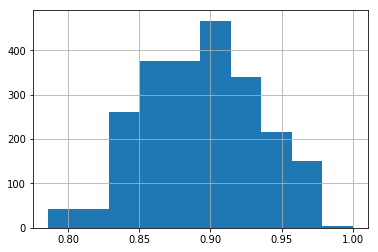

In [11]:
print (Submission['Welo'].max())
counter2 = 0
for i in Submission.iterrows():
    Submission.iat[counter2,4] = (i[1].Welo - minelo)/range_of_elo
    Submission.iat[counter2,5] = (i[1].Lelo - minelo)/range_of_elo
    counter2 = counter2+1
print (Submission['normWelo'].min())

Submission['normWelo'].hist()

In [13]:
finalfile = Submission


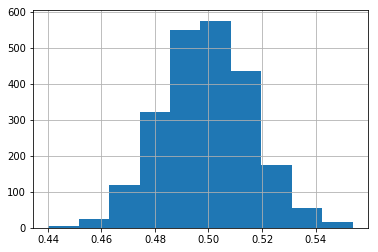

In [15]:
finalfile['Pred'] = finalfile['normWelo']/(finalfile['normWelo']+finalfile['normLelo'])
finalfile['Pred'].hist()

In [16]:
finalfile = finalfile.drop(['Welo','Lelo','normWelo','normLelo'],axis=1)
finalfile['Pred'] = np.where(finalfile['Pred']>=0.5, 1, 0)

In [17]:
finalfile.to_csv("/Users/pallavisreerama/Desktop/submitfilestage2.csv")

In [8]:
for j in temp.iterrows():
    ###########################################################################################
    #######New logic####### 
    
    winner_rating = pow(10,(elo_dict[j[1].WTeamID])/400)
    loser_rating = pow(10,(elo_dict[j[1].LTeamID])/400)
    
    expected_winner = winner_rating/(winner_rating+loser_rating) 
    expected_loser = loser_rating/(winner_rating+loser_rating)
    
    winner = 1
    loser = 0
    
    new_winner_rating = elo_dict[j[1].WTeamID] + k * (winner-expected_winner)
    new_loser_rating = elo_dict[j[1].LTeamID] + k * (loser-expected_loser)
    ###########################################################################################
#     a =  1/(1+pow(10,((elo_dict[j[1].WTeamID]-elo_dict[j[1].LTeamID])/100)))
#     b =  1/(1+pow(10,((elo_dict[j[1].LTeamID]-elo_dict[j[1].WTeamID])/100)))
#     a_new = elo_dict[j[1].WTeamID] + k*(j[1].WScore/100 - a)
#     b_new = elo_dict[j[1].LTeamID] - k*(j[1].LScore/100 - b)
    elo_dict[j[1].WTeamID] = new_winner_rating
    elo_dict[j[1].LTeamID] = new_loser_rating

    temp.iat[i,9] = new_winner_rating
    temp.iat[i,10] = new_loser_rating

    i = i + 1
#     if (j[1].WTeamID == 1102 or j[1].LTeamID == 1102):
#         print (j[1].WScore)
#         print (j[1].LScore)
#         print(elo_dict[1102])
    